In [ ]:
pip install 

In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 200)
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

## Defining files names
file_key_1 = 'AmericanExpress/train_data.csv'
file_key_2 = 'AmericanExpress/train_labels.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

## Creating data-type dictionary for reading the train data-frame
dtype_dict = {'customer_ID': "object", 'S_2': "object", 'P_2': 'float16', 'D_39': 'float16', 'B_1': 'float16','B_2': 'float16',
              'R_1': 'float16','S_3': 'float16','D_41': 'float16','B_3': 'float16','D_42': 'float16','D_43': 'float16','D_44': 'float16',
              'B_4': 'float16','D_45': 'float16','B_5': 'float16','R_2': 'float16','D_46': 'float16','D_47': 'float16','D_48': 'float16',
              'D_49': 'float16','B_6': 'float16','B_7': 'float16','B_8': 'float16','D_50': 'float16','D_51': 'float16','B_9': 'float16',
              'R_3': 'float16','D_52': 'float16','P_3': 'float16','B_10': 'float16','D_53': 'float16','S_5': 'float16','B_11': 'float16',
              'S_6': 'float16','D_54': 'float16','R_4': 'float16','S_7': 'float16','B_12': 'float16','S_8': 'float16','D_55': 'float16',
              'D_56': 'float16','B_13': 'float16','R_5': 'float16','D_58': 'float16','S_9': 'float16','B_14': 'float16','D_59': 'float16',
              'D_60': 'float16','D_61': 'float16','B_15': 'float16','S_11': 'float16','D_62': 'float16','D_63': 'object','D_64': 'object',
              'D_65': 'float16','B_16': 'float16','B_17': 'float16','B_18': 'float16','B_19': 'float16','D_66': 'float16','B_20': 'float16',
              'D_68': 'float16','S_12': 'float16','R_6': 'float16','S_13': 'float16','B_21': 'float16','D_69': 'float16','B_22': 'float16',
              'D_70': 'float16','D_71': 'float16','D_72': 'float16','S_15': 'float16','B_23': 'float16','D_73': 'float16','P_4': 'float16',
              'D_74': 'float16','D_75': 'float16','D_76': 'float16','B_24': 'float16','R_7': 'float16','D_77': 'float16','B_25': 'float16',
              'B_26': 'float16','D_78': 'float16','D_79': 'float16','R_8': 'float16','R_9': 'float16','S_16': 'float16','D_80': 'float16',
              'R_10': 'float16','R_11': 'float16','B_27': 'float16','D_81': 'float16','D_82': 'float16','S_17': 'float16','R_12': 'float16',
              'B_28': 'float16','R_13': 'float16','D_83': 'float16','R_14': 'float16','R_15': 'float16','D_84': 'float16','R_16': 'float16',
              'B_29': 'float16','B_30': 'float16','S_18': 'float16','D_86': 'float16','D_87': 'float16','R_17': 'float16','R_18': 'float16',
              'D_88': 'float16','B_31': 'int64','S_19': 'float16','R_19': 'float16','B_32': 'float16','S_20': 'float16','R_20': 'float16',
              'R_21': 'float16','B_33': 'float16','D_89': 'float16','R_22': 'float16','R_23': 'float16','D_91': 'float16','D_92': 'float16',
              'D_93': 'float16','D_94': 'float16','R_24': 'float16','R_25': 'float16','D_96': 'float16','S_22': 'float16','S_23': 'float16',
              'S_24': 'float16','S_25': 'float16','S_26': 'float16','D_102': 'float16','D_103': 'float16','D_104': 'float16','D_105': 'float16',
              'D_106': 'float16','D_107': 'float16','B_36': 'float16','B_37': 'float16', 'R_26': 'float16','R_27': 'float16','B_38': 'float16',
              'D_108': 'float16','D_109': 'float16','D_110': 'float16','D_111': 'float16','B_39': 'float16','D_112': 'float16','B_40': 'float16',
              'S_27': 'float16','D_113': 'float16','D_114': 'float16','D_115': 'float16','D_116': 'float16','D_117': 'float16','D_118': 'float16',
              'D_119': 'float16','D_120': 'float16','D_121': 'float16','D_122': 'float16','D_123': 'float16','D_124': 'float16','D_125': 'float16',
              'D_126': 'float16','D_127': 'float16','D_128': 'float16','D_129': 'float16','B_41': 'float16','B_42': 'float16','D_130': 'float16',
              'D_131': 'float16','D_132': 'float16','D_133': 'float16','R_28': 'float16','D_134': 'float16','D_135': 'float16','D_136': 'float16',
              'D_137': 'float16','D_138': 'float16','D_139': 'float16','D_140': 'float16','D_141': 'float16','D_142': 'float16','D_143': 'float16',
              'D_144': 'float16','D_145': 'float16'}

## Reading data-files
train = pd.read_csv(file_content_stream_1, dtype = dtype_dict)
target = pd.read_csv(file_content_stream_2)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [3]:
## Appending target variables
train = pd.merge(train, target, on = 'customer_ID', how = 'left')
train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,NaN,NaN,0.000630,0.080994,0.708984,0.170654,0.006203,0.358643,0.525391,0.255615,NaN,0.063904,0.059418,0.006466,0.148682,1.335938,0.008209,0.001423,0.207275,0.736328,0.096191,NaN,0.023376,0.002768,0.008324,1.001953,0.008301,0.161377,0.148315,0.922852,0.354492,0.151978,0.118103,0.001882,0.158569,0.065735,0.018387,0.063660,0.199585,0.308350,0.016357,0.401611,0.091064,CR,O,0.007126,0.007664,NaN,0.652832,0.008522,NaN,0.004730,6.0,0.271973,0.008362,0.515137,0.002644,0.009010,0.004807,0.008339,0.119385,0.004803,0.108276,0.050873,NaN,0.007553,0.080444,0.069092,NaN,0.004326,0.007561,NaN,0.007729,0.000272,0.001575,0.004238,0.001434,NaN,0.002272,0.004059,0.007122,0.002457,0.002310,0.003532,0.506836,0.008034,1.009766,0.084656,0.003820,0.007042,0.000438,0.006451,0.000830,0.005054,NaN,0.0,0.005722,0.007084,NaN,0.000198,0.008911,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002449,1.000977,0.002665,0.007481,0.006893,1.503906,1.005859,0.003569,0.008873,0.003948,0.003647,0.004951,0.894043,0.135620,0.911133,0.974609,0.001244,0.766602,1.008789,1.004883,0.893555,NaN,0.669922,0.009972,0.004570,NaN,1.008789,2.0,NaN,0.004326,NaN,NaN,NaN,1.007812,0.210083,0.676758,0.007874,1.0,0.238281,0.0,4.0,0.232178,0.236206,0.0,0.702148,0.434326,0.003057,0.686523,0.008743,1.0,1.002930,1.007812,1.000000,0.006805,NaN,0.002052,0.005970,NaN,0.004345,0.001534,NaN,NaN,NaN,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,NaN,NaN,0.002525,0.069397,0.712891,0.113220,0.006207,0.353516,0.521484,0.223389,NaN,0.065247,0.057739,0.001614,0.149780,1.339844,0.008369,0.001984,0.202759,0.720703,0.099792,NaN,0.030594,0.002748,0.002481,1.008789,0.005135,0.140991,0.143555,0.919434,0.326660,0.156250,0.118713,0.001610,0.148438,0.093933,0.013039,0.065491,0.151367,0.265137,0.017685,0.406250,0.086792,CR,O,0.002413,0.007149,NaN,0.646973,0.002237,NaN,0.003880,6.0,0.188965,0.004028,0.509277,0.004192,0.007843,0.001283,0.006523,0.140625,0.000094,0.101013,0.040466,NaN,0.004833,0.081421,0.074158,NaN,0.004204,0.005302,NaN,0.001864,0.000978,0.009895,0.007599,0.000509,NaN,0.009811,0.000126,0.005966,0.000395,0.001327,0.007774,0.500977,0.000761,1.009766,0.081848,0.000347,0.007790,0.004311,0.002333,0.009468,0.003754,NaN,0.0,0.007584,0.006676,NaN,0.001143,0.005905,NaN,1,0.008430,0.008980,0.001854,0.009926,0.005989,0.002247,1.006836,0.002508,0.006828,0.002836,1.503906,1.005859,0.000571,0.000391,0.008354,0.008850,0.003180,0.902344,0.136353,0.919922,0.975586,0.004562,0.786133,1.000000,1.003906,0.906738,NaN,0.668457,0.003922,0.004654,NaN,1.002930,2.0,NaN,0.008705,NaN,NaN,NaN,1.007812,0.184082,0.822266,0.003445,1.0,0.247192,0.0,4.0,0.243530,0.241943,0.0,0.707031,0.430420,0.001306,0.686523,0.000755,1.0,1.008789,1.003906,1.008789,0.004406,NaN,0.001034,0.0048

## Data Visualization (Payment Variables)

In [31]:
my_variables = train.columns
[x for x in my_variables if x.startswith('P_')]

['P_2', 'P_3', 'P_4']

<AxesSubplot:xlabel='target', ylabel='P_4'>

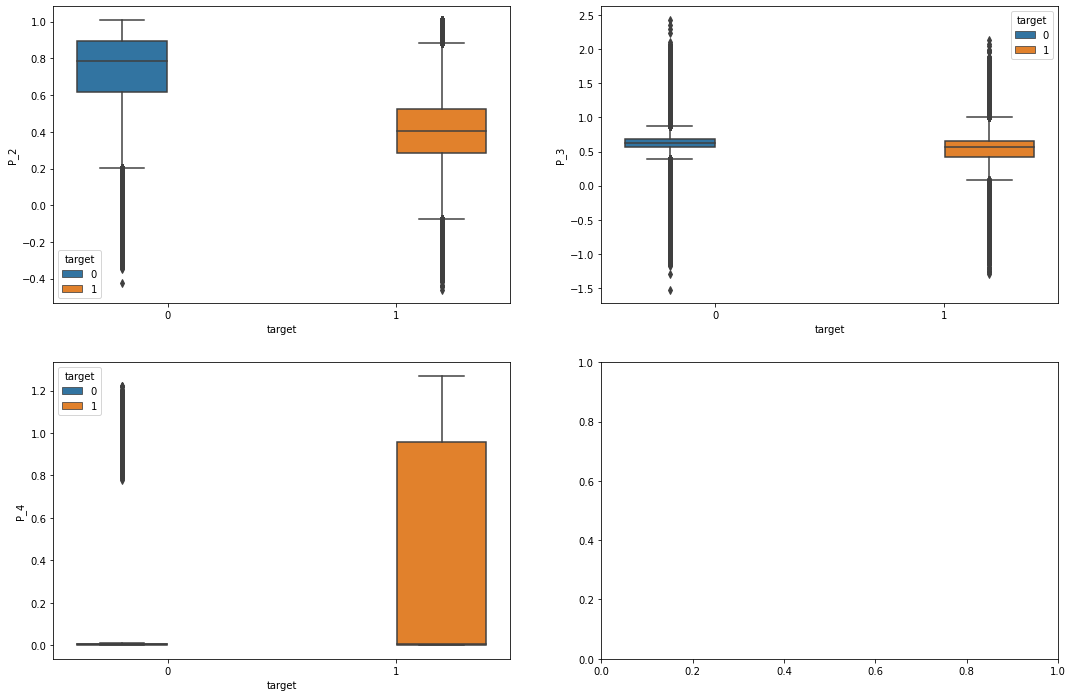

In [11]:
## Creating a new figure
fig, axes = plt.subplots(2, 2, figsize = (18, 12))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'P_2', hue = 'target', data = train)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'P_3', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'P_4', hue = 'target', data = train)

## Data Visualization (Delinquency Variables)

In [32]:
my_variables = train.columns
[x for x in my_variables if x.startswith('D_')]

['D_39',
 'D_41',
 'D_42',
 'D_43',
 'D_44',
 'D_45',
 'D_46',
 'D_47',
 'D_48',
 'D_49',
 'D_50',
 'D_51',
 'D_52',
 'D_53',
 'D_54',
 'D_55',
 'D_56',
 'D_58',
 'D_59',
 'D_60',
 'D_61',
 'D_62',
 'D_63',
 'D_64',
 'D_65',
 'D_66',
 'D_68',
 'D_69',
 'D_70',
 'D_71',
 'D_72',
 'D_73',
 'D_74',
 'D_75',
 'D_76',
 'D_77',
 'D_78',
 'D_79',
 'D_80',
 'D_81',
 'D_82',
 'D_83',
 'D_84',
 'D_86',
 'D_87',
 'D_88',
 'D_89',
 'D_91',
 'D_92',
 'D_93',
 'D_94',
 'D_96',
 'D_102',
 'D_103',
 'D_104',
 'D_105',
 'D_106',
 'D_107',
 'D_108',
 'D_109',
 'D_110',
 'D_111',
 'D_112',
 'D_113',
 'D_114',
 'D_115',
 'D_116',
 'D_117',
 'D_118',
 'D_119',
 'D_120',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_126',
 'D_127',
 'D_128',
 'D_129',
 'D_130',
 'D_131',
 'D_132',
 'D_133',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_139',
 'D_140',
 'D_141',
 'D_142',
 'D_143',
 'D_144',
 'D_145']

<AxesSubplot:xlabel='target', ylabel='D_145'>

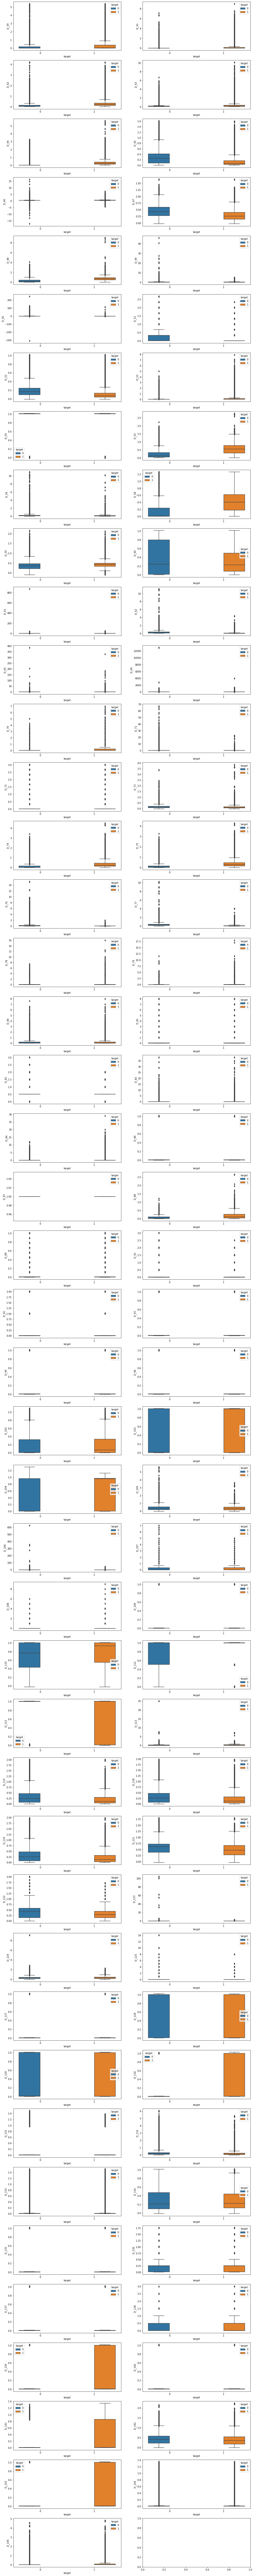

In [28]:
## Creating a new figure
fig, axes = plt.subplots(44, 2, figsize = (18, 200))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'D_39', hue = 'target', data = train)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'D_41', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'D_42', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 1], x = 'target', y = 'D_43', hue = 'target', data = train)
sns.boxplot(ax = axes[2, 0], x = 'target', y = 'D_44', hue = 'target', data = train)
sns.boxplot(ax = axes[2, 1], x = 'target', y = 'D_45', hue = 'target', data = train)
sns.boxplot(ax = axes[3, 0], x = 'target', y = 'D_46', hue = 'target', data = train)
sns.boxplot(ax = axes[3, 1], x = 'target', y = 'D_47', hue = 'target', data = train)
sns.boxplot(ax = axes[4, 0], x = 'target', y = 'D_48', hue = 'target', data = train)
sns.boxplot(ax = axes[4, 1], x = 'target', y = 'D_49', hue = 'target', data = train)
sns.boxplot(ax = axes[5, 0], x = 'target', y = 'D_50', hue = 'target', data = train)
sns.boxplot(ax = axes[5, 1], x = 'target', y = 'D_51', hue = 'target', data = train)
sns.boxplot(ax = axes[6, 0], x = 'target', y = 'D_52', hue = 'target', data = train)
sns.boxplot(ax = axes[6, 1], x = 'target', y = 'D_53', hue = 'target', data = train)
sns.boxplot(ax = axes[7, 0], x = 'target', y = 'D_54', hue = 'target', data = train)
sns.boxplot(ax = axes[7, 1], x = 'target', y = 'D_55', hue = 'target', data = train)
sns.boxplot(ax = axes[8, 0], x = 'target', y = 'D_56', hue = 'target', data = train)
sns.boxplot(ax = axes[8, 1], x = 'target', y = 'D_58', hue = 'target', data = train)
sns.boxplot(ax = axes[9, 0], x = 'target', y = 'D_59', hue = 'target', data = train)
sns.boxplot(ax = axes[9, 1], x = 'target', y = 'D_60', hue = 'target', data = train)
sns.boxplot(ax = axes[10, 0], x = 'target', y = 'D_61', hue = 'target', data = train)
sns.boxplot(ax = axes[10, 1], x = 'target', y = 'D_62', hue = 'target', data = train)
sns.boxplot(ax = axes[11, 0], x = 'target', y = 'D_65', hue = 'target', data = train)
sns.boxplot(ax = axes[11, 1], x = 'target', y = 'D_69', hue = 'target', data = train)
sns.boxplot(ax = axes[12, 0], x = 'target', y = 'D_70', hue = 'target', data = train)
sns.boxplot(ax = axes[12, 1], x = 'target', y = 'D_71', hue = 'target', data = train)
sns.boxplot(ax = axes[13, 0], x = 'target', y = 'D_72', hue = 'target', data = train)
sns.boxplot(ax = axes[13, 1], x = 'target', y = 'D_73', hue = 'target', data = train)
sns.boxplot(ax = axes[14, 0], x = 'target', y = 'D_74', hue = 'target', data = train)
sns.boxplot(ax = axes[14, 1], x = 'target', y = 'D_75', hue = 'target', data = train)
sns.boxplot(ax = axes[15, 0], x = 'target', y = 'D_76', hue = 'target', data = train)
sns.boxplot(ax = axes[15, 1], x = 'target', y = 'D_77', hue = 'target', data = train)
sns.boxplot(ax = axes[16, 0], x = 'target', y = 'D_78', hue = 'target', data = train)
sns.boxplot(ax = axes[16, 1], x = 'target', y = 'D_79', hue = 'target', data = train)
sns.boxplot(ax = axes[17, 0], x = 'target', y = 'D_80', hue = 'target', data = train)
sns.boxplot(ax = axes[17, 1], x = 'target', y = 'D_81', hue = 'target', data = train)
sns.boxplot(ax = axes[18, 0], x = 'target', y = 'D_82', hue = 'target', data = train)
sns.boxplot(ax = axes[18, 1], x = 'target', y = 'D_83', hue = 'target', data = train)
sns.boxplot(ax = axes[19, 0], x = 'target', y = 'D_84', hue = 'target', data = train)
sns.boxplot(ax = axes[19, 1], x = 'target', y = 'D_86', hue = 'target', data = train)
sns.boxplot(ax = axes[20, 0], x = 'target', y = 'D_87', hue = 'target', data = train)
sns.boxplot(ax = axes[20, 1], x = 'target', y = 'D_88', hue = 'target', data = train)
sns.boxplot(ax = axes[21, 0], x = 'target', y = 'D_89', hue = 'target', data = train)
sns.boxplot(ax = axes[21, 1], x = 'target', y = 'D_91', hue = 'target', data = train)
sns.boxplot(ax = axes[22, 0], x = 'target', y = 'D_92', hue = 'target', data = train)
sns.boxplot(ax = axes[22, 1], x = 'target', y = 'D_93', hue = 'target', data = train)
sns.boxplot(ax = axes[23, 0], x = 'target', y = 'D_94', hue = 'target', data = train)
sns.boxplot(ax = axes[23, 1], x = 'target', y = 'D_96', hue = 'target', data = train)
sns.boxplot(ax = axes[24, 0], x = 'target', y = 'D_102', hue = 'target', data = train)
sns.boxplot(ax = axes[24, 1], x = 'target', y = 'D_103', hue = 'target', data = train)
sns.boxplot(ax = axes[25, 0], x = 'target', y = 'D_104', hue = 'target', data = train)
sns.boxplot(ax = axes[25, 1], x = 'target', y = 'D_105', hue = 'target', data = train)
sns.boxplot(ax = axes[26, 0], x = 'target', y = 'D_106', hue = 'target', data = train)
sns.boxplot(ax = axes[26, 1], x = 'target', y = 'D_107', hue = 'target', data = train)
sns.boxplot(ax = axes[27, 0], x = 'target', y = 'D_108', hue = 'target', data = train)
sns.boxplot(ax = axes[27, 1], x = 'target', y = 'D_109', hue = 'target', data = train)
sns.boxplot(ax = axes[28, 0], x = 'target', y = 'D_110', hue = 'target', data = train)
sns.boxplot(ax = axes[28, 1], x = 'target', y = 'D_111', hue = 'target', data = train)
sns.boxplot(ax = axes[29, 0], x = 'target', y = 'D_112', hue = 'target', data = train)
sns.boxplot(ax = axes[29, 1], x = 'target', y = 'D_113', hue = 'target', data = train)
sns.boxplot(ax = axes[30, 0], x = 'target', y = 'D_115', hue = 'target', data = train)
sns.boxplot(ax = axes[30, 1], x = 'target', y = 'D_118', hue = 'target', data = train)
sns.boxplot(ax = axes[31, 0], x = 'target', y = 'D_119', hue = 'target', data = train)
sns.boxplot(ax = axes[31, 1], x = 'target', y = 'D_121', hue = 'target', data = train)
sns.boxplot(ax = axes[32, 0], x = 'target', y = 'D_122', hue = 'target', data = train)
sns.boxplot(ax = axes[32, 1], x = 'target', y = 'D_123', hue = 'target', data = train)
sns.boxplot(ax = axes[33, 0], x = 'target', y = 'D_124', hue = 'target', data = train)
sns.boxplot(ax = axes[33, 1], x = 'target', y = 'D_125', hue = 'target', data = train)
sns.boxplot(ax = axes[34, 0], x = 'target', y = 'D_127', hue = 'target', data = train)
sns.boxplot(ax = axes[34, 1], x = 'target', y = 'D_128', hue = 'target', data = train)
sns.boxplot(ax = axes[35, 0], x = 'target', y = 'D_129', hue = 'target', data = train)
sns.boxplot(ax = axes[35, 1], x = 'target', y = 'D_130', hue = 'target', data = train)
sns.boxplot(ax = axes[36, 0], x = 'target', y = 'D_131', hue = 'target', data = train)
sns.boxplot(ax = axes[36, 1], x = 'target', y = 'D_132', hue = 'target', data = train)
sns.boxplot(ax = axes[37, 0], x = 'target', y = 'D_133', hue = 'target', data = train)
sns.boxplot(ax = axes[37, 1], x = 'target', y = 'D_134', hue = 'target', data = train)
sns.boxplot(ax = axes[38, 0], x = 'target', y = 'D_135', hue = 'target', data = train)
sns.boxplot(ax = axes[38, 1], x = 'target', y = 'D_136', hue = 'target', data = train)
sns.boxplot(ax = axes[39, 0], x = 'target', y = 'D_137', hue = 'target', data = train)
sns.boxplot(ax = axes[39, 1], x = 'target', y = 'D_138', hue = 'target', data = train)
sns.boxplot(ax = axes[40, 0], x = 'target', y = 'D_139', hue = 'target', data = train)
sns.boxplot(ax = axes[40, 1], x = 'target', y = 'D_140', hue = 'target', data = train)
sns.boxplot(ax = axes[41, 0], x = 'target', y = 'D_141', hue = 'target', data = train)
sns.boxplot(ax = axes[41, 1], x = 'target', y = 'D_142', hue = 'target', data = train)
sns.boxplot(ax = axes[42, 0], x = 'target', y = 'D_143', hue = 'target', data = train)
sns.boxplot(ax = axes[42, 1], x = 'target', y = 'D_144', hue = 'target', data = train)
sns.boxplot(ax = axes[43, 0], x = 'target', y = 'D_145', hue = 'target', data = train)

## Data Visualization (Spend Variables)

In [33]:
my_variables = train.columns
[x for x in my_variables if x.startswith('S_')]

['S_2',
 'S_3',
 'S_5',
 'S_6',
 'S_7',
 'S_8',
 'S_9',
 'S_11',
 'S_12',
 'S_13',
 'S_15',
 'S_16',
 'S_17',
 'S_18',
 'S_19',
 'S_20',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'S_27']

<AxesSubplot:xlabel='target', ylabel='S_27'>

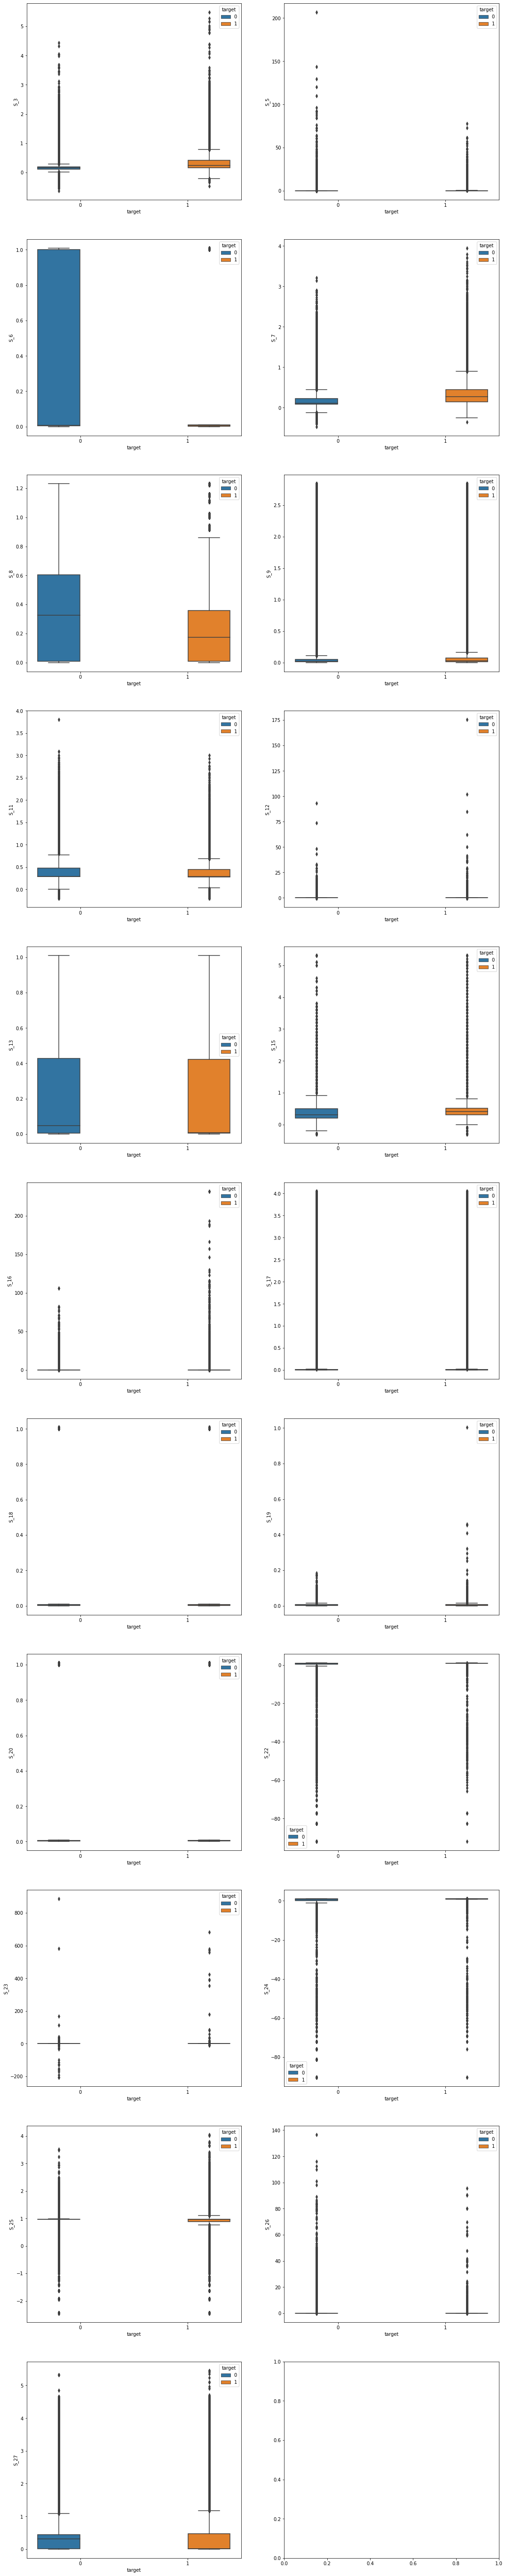

In [38]:
## Creating a new figure
fig, axes = plt.subplots(11, 2, figsize = (18, 100))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'S_3', hue = 'target', data = train)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'S_5', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'S_6', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 1], x = 'target', y = 'S_7', hue = 'target', data = train)
sns.boxplot(ax = axes[2, 0], x = 'target', y = 'S_8', hue = 'target', data = train)
sns.boxplot(ax = axes[2, 1], x = 'target', y = 'S_9', hue = 'target', data = train)
sns.boxplot(ax = axes[3, 0], x = 'target', y = 'S_11', hue = 'target', data = train)
sns.boxplot(ax = axes[3, 1], x = 'target', y = 'S_12', hue = 'target', data = train)
sns.boxplot(ax = axes[4, 0], x = 'target', y = 'S_13', hue = 'target', data = train)
sns.boxplot(ax = axes[4, 1], x = 'target', y = 'S_15', hue = 'target', data = train)
sns.boxplot(ax = axes[5, 0], x = 'target', y = 'S_16', hue = 'target', data = train)
sns.boxplot(ax = axes[5, 1], x = 'target', y = 'S_17', hue = 'target', data = train)
sns.boxplot(ax = axes[6, 0], x = 'target', y = 'S_18', hue = 'target', data = train)
sns.boxplot(ax = axes[6, 1], x = 'target', y = 'S_19', hue = 'target', data = train)
sns.boxplot(ax = axes[7, 0], x = 'target', y = 'S_20', hue = 'target', data = train)
sns.boxplot(ax = axes[7, 1], x = 'target', y = 'S_22', hue = 'target', data = train)
sns.boxplot(ax = axes[8, 0], x = 'target', y = 'S_23', hue = 'target', data = train)
sns.boxplot(ax = axes[8, 1], x = 'target', y = 'S_24', hue = 'target', data = train)
sns.boxplot(ax = axes[9, 0], x = 'target', y = 'S_25', hue = 'target', data = train)
sns.boxplot(ax = axes[9, 1], x = 'target', y = 'S_26', hue = 'target', data = train)
sns.boxplot(ax = axes[10, 0], x = 'target', y = 'S_27', hue = 'target', data = train)

## Data Visualization (Balance Variables)

In [39]:
my_variables = train.columns
[x for x in my_variables if x.startswith('B_')]

['B_1',
 'B_2',
 'B_3',
 'B_4',
 'B_5',
 'B_6',
 'B_7',
 'B_8',
 'B_9',
 'B_10',
 'B_11',
 'B_12',
 'B_13',
 'B_14',
 'B_15',
 'B_16',
 'B_17',
 'B_18',
 'B_19',
 'B_20',
 'B_21',
 'B_22',
 'B_23',
 'B_24',
 'B_25',
 'B_26',
 'B_27',
 'B_28',
 'B_29',
 'B_30',
 'B_31',
 'B_32',
 'B_33',
 'B_36',
 'B_37',
 'B_38',
 'B_39',
 'B_40',
 'B_41',
 'B_42']

In [ ]:
## Creating a new figure
fig, axes = plt.subplots(19, 2, figsize = (18, 150))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'B_1', hue = 'target', data = train)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'B_2', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'B_3', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 1], x = 'target', y = 'B_4', hue = 'target', data = train)
sns.boxplot(ax = axes[2, 0], x = 'target', y = 'B_5', hue = 'target', data = train)
sns.boxplot(ax = axes[2, 1], x = 'target', y = 'B_6', hue = 'target', data = train)
sns.boxplot(ax = axes[3, 0], x = 'target', y = 'B_7', hue = 'target', data = train)
sns.boxplot(ax = axes[3, 1], x = 'target', y = 'B_8', hue = 'target', data = train)
sns.boxplot(ax = axes[4, 0], x = 'target', y = 'B_9', hue = 'target', data = train)
sns.boxplot(ax = axes[4, 1], x = 'target', y = 'B_10', hue = 'target', data = train)
sns.boxplot(ax = axes[5, 0], x = 'target', y = 'B_11', hue = 'target', data = train)
sns.boxplot(ax = axes[5, 1], x = 'target', y = 'B_12', hue = 'target', data = train)
sns.boxplot(ax = axes[6, 0], x = 'target', y = 'B_13', hue = 'target', data = train)
sns.boxplot(ax = axes[6, 1], x = 'target', y = 'B_14', hue = 'target', data = train)
sns.boxplot(ax = axes[7, 0], x = 'target', y = 'B_15', hue = 'target', data = train)
sns.boxplot(ax = axes[7, 1], x = 'target', y = 'B_16', hue = 'target', data = train)
sns.boxplot(ax = axes[8, 0], x = 'target', y = 'B_17', hue = 'target', data = train)
sns.boxplot(ax = axes[8, 1], x = 'target', y = 'B_18', hue = 'target', data = train)
sns.boxplot(ax = axes[9, 0], x = 'target', y = 'B_19', hue = 'target', data = train)
sns.boxplot(ax = axes[9, 1], x = 'target', y = 'B_20', hue = 'target', data = train)
sns.boxplot(ax = axes[10, 0], x = 'target', y = 'B_21', hue = 'target', data = train)
sns.boxplot(ax = axes[10, 1], x = 'target', y = 'B_22', hue = 'target', data = train)
sns.boxplot(ax = axes[11, 0], x = 'target', y = 'B_23', hue = 'target', data = train)
sns.boxplot(ax = axes[11, 1], x = 'target', y = 'B_24', hue = 'target', data = train)
sns.boxplot(ax = axes[12, 0], x = 'target', y = 'B_25', hue = 'target', data = train)
sns.boxplot(ax = axes[12, 1], x = 'target', y = 'B_26', hue = 'target', data = train)
sns.boxplot(ax = axes[13, 0], x = 'target', y = 'B_27', hue = 'target', data = train)
sns.boxplot(ax = axes[13, 1], x = 'target', y = 'B_28', hue = 'target', data = train)
sns.boxplot(ax = axes[14, 0], x = 'target', y = 'B_29', hue = 'target', data = train)
sns.boxplot(ax = axes[14, 1], x = 'target', y = 'B_31', hue = 'target', data = train)
sns.boxplot(ax = axes[15, 0], x = 'target', y = 'B_32', hue = 'target', data = train)
sns.boxplot(ax = axes[15, 1], x = 'target', y = 'B_33', hue = 'target', data = train)
sns.boxplot(ax = axes[16, 0], x = 'target', y = 'B_36', hue = 'target', data = train)
sns.boxplot(ax = axes[16, 1], x = 'target', y = 'B_37', hue = 'target', data = train)
sns.boxplot(ax = axes[17, 0], x = 'target', y = 'B_39', hue = 'target', data = train)
sns.boxplot(ax = axes[17, 1], x = 'target', y = 'B_40', hue = 'target', data = train)
sns.boxplot(ax = axes[18, 0], x = 'target', y = 'B_41', hue = 'target', data = train)
sns.boxplot(ax = axes[18, 1], x = 'target', y = 'B_42', hue = 'target', data = train)

<AxesSubplot:xlabel='target', ylabel='B_42'>

## Feature Engineering 

In [ ]:
train['customer_ID'].unique()[1]

In [ ]:
train[train['customer_ID'] == '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5'].reset_index(drop = True)

In [ ]:
train[train['customer_ID'] == '0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85'].reset_index(drop = True)

In [ ]:
target[target['customer_ID'] == '00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5']

In [ ]:
target[target['target'] == 1]['customer_ID'].reset_index(drop = True)[0]

In [ ]:
target.shape

In [ ]:
len(train['customer_ID'].unique())

In [ ]:
len(target['customer_ID'].unique())

In [ ]:
## Appending the target values